K-Means代码实现原理

$选取k个初始化质心$
<br>
$\quad repeat:$
<br>
$\qquad 对每个样本点计算得到离其最近的质心，将其归为对应的cluster$
<br>
$\qquad 重新计算k个cluster的质心$
<br>
$\quad until 质心不发生变化$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets

代码实现

In [2]:
# 初始化我们的质心，从原有的数据中选取K个座位质心
def InitCentroids(X, k):
    index = np.random.randint(0,len(X)-1,k)
    return X[index]

In [3]:
#返回x的每行所属的中心点索引
def findClosestCentroids(X, centroids):
    idx = np.zeros(len(X)).reshape( -1,1)  # 总共有len(X)行数据，所以idx是一个 len(X) * 1  得矩阵
    for i in range(len(X)):
        min_distance = float('inf');#初始无限大
        index = 0
        for k in range(len(centroids)):
            # 计算每个点到相应质心的距离
            distance = np.sum(np.power(X[i]-centroids[k],2))
            # 不断更新最近的质心信息
            if(distance<min_distance):
                min_distance = distance
                index = k
        idx[i]=index
    return idx

In [4]:
'''
      K: 聚类的个数
    idx: 每行所对应的质心的索引
'''
def computeCentroids(X, idx):
    k = np.unique(idx) #idx = [0, 0, 1, 1, 2, 2] 那么我们要取出Cluster的编号，只需要进行unique即可
    centroids = np.ndarray((len(k),X.shape[1]))
    for i in range(len(k)):
        # 得出每个质心对应的Cluster的数据
        data = X[np.where(idx==k[i])[0]]
        # 重新计算质心
        centroids[i] = np.sum(data,axis=0)/len(data)
    return centroids

In [5]:
def runkMeans(X, K, max_iters = 10):
    # 计算出我们初始化的质心
    initial_centroids = InitCentroids(X,K)
    # 进行分Cluster
    idx = findClosestCentroids(X, initial_centroids)
    # 重新计算质心
    centroids = computeCentroids(X, idx)

    ax = plt.subplot(max_iters / 3+1, 3, 1)
    ax.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), s=20)
    ax.scatter(centroids[:, 0], centroids[:, 1], s=50)

    # 接下来就是我们不断迭代的过程
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx)

        ax = plt.subplot(max_iters / 3+1, 3,i+2)
        ax.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), s=20)
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50) # 质心标记为星号

    plt.show()
    return idx,centroids

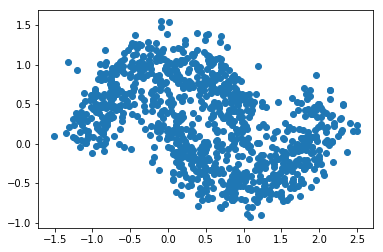

In [6]:
# 准备我们的数据集
plt.subplot(111)  
X,y=datasets.make_moons(n_samples=1000,noise=0.2)    
plt.scatter(X[:,0],X[:,1])  
plt.show() 

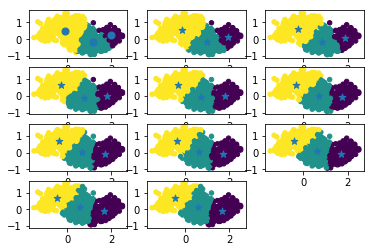

In [8]:
idx,centroids = runkMeans(X, 3)